# Módulo 07, Tarefa 01

Vamos começar a mexer na nossa base de projeto? Já fizemos um exercício de montar a variável resposta, já pudemos perceber que essa atividade pode não ser trivial. Vamos agora trabalhar a base para que fique propícia ao *scikitlearn* para trabalharmos.

Lembrando, a base se chama demo01.csv, e originalmente está publicada [aqui](https://www.kaggle.com/rikdifos/credit-card-approval-prediction).

#### 1) Carregue a base e avalie:

- As variáveis
- Tipos de dados de cada variável
- Quantidade de missings
- Distribuição da variável resposta (mau)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('demo01.csv')
df

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
0,M,Y,Y,0,Working,Secondary / secondary special,Married,House / apartment,58.832877,3.106849,1,0,0,0,2.0,False
1,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
2,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
3,M,Y,Y,0,Working,Higher education,Married,House / apartment,46.224658,2.106849,1,1,1,1,2.0,False
4,F,Y,N,0,Working,Incomplete higher,Married,House / apartment,29.230137,3.021918,1,0,0,0,2.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16645,F,N,Y,0,Working,Secondary / secondary special,Civil marriage,House / apartment,54.109589,9.884932,1,0,0,0,2.0,True
16646,F,N,Y,0,Commercial associate,Secondary / secondary special,Married,House / apartment,43.389041,7.380822,1,1,1,0,2.0,True
16647,M,Y,Y,0,Working,Secondary / secondary special,Married,House / apartment,30.005479,9.800000,1,1,0,0,2.0,True
16648,M,Y,Y,0,Working,Secondary / secondary special,Married,House / apartment,30.005479,9.800000,1,1,0,0,2.0,True


#### 2) Vamos montar um metadados

1. Crie um dataframe com os nomes de cada variável e o tipo de dados de cada variável.
2. Adicione uma coluna nesse *dataframe* chamada "qtd_categorias" e coloque nela o número de categorias correspondente de cada variável. 
    Dica: 
        1. inicie uma lista vazia
        2. faça um for ao longo dos nomes das variáveis, 
        3. conte o número de categorias dessa variável 
        4. acumule essa informação de 3. na lista que você criou em 1. 
        5. No final, essa lista pode ser atribuída à nossa variável.
3. Crie variáveis dummy para as variáveis necessárias (i.e. aquelas que são qualitativas e não estão armazenadas como {0, 1} ou {True, False}.

In [9]:
new_df = pd.DataFrame(df.dtypes, columns = ['tipo_variavel'])

new_df

,tipo_variavel
sexo,object
posse_de_veiculo,object
posse_de_imovel,object
qtd_filhos,int64
tipo_renda,object
educacao,object
estado_civil,object
tipo_residencia,object
idade,float64
tempo_emprego,float64


In [11]:
new_df['qtd_categorias'] = 0

for var in new_df.index:
    new_df.loc[var,'qtd_categorias'] = len(df.groupby([var]).size())
    
new_df

,tipo_variavel,qtd_categorias
sexo,object,2
posse_de_veiculo,object,2
posse_de_imovel,object,2
qtd_filhos,int64,8
tipo_renda,object,5
educacao,object,5
estado_civil,object,5
tipo_residencia,object,6
idade,float64,5298
tempo_emprego,float64,3005


#### 3) Crie variáveis dummy para as variáveis necessárias (i.e. aquelas que são qualitativas e não estão armazenadas como {0, 1} ou {True, False}. Crie um *dataframe* apenas com as variáveis apropriadas para entrada no scikitlearn - elimine as variáveis tipo *str*, mantendo apenas suas versões *dummy*.

In [13]:
demo_01_dummy = pd.get_dummies(df, columns=['tipo_residencia'
                                                 ,'estado_civil'
                                                 ,'educacao'
                                                 ,'tipo_renda'
                                                 ,'posse_de_imovel'
                                                 ,'posse_de_veiculo'
                                                 ,'sexo']
                               , drop_first=True)
demo_01_dummy.head(20)

,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau,tipo_residencia_House / apartment,...,educacao_Incomplete higher,educacao_Lower secondary,educacao_Secondary / secondary special,tipo_renda_Pensioner,tipo_renda_State servant,tipo_renda_Student,tipo_renda_Working,posse_de_imovel_Y,posse_de_veiculo_Y,sexo_M
0,0,58.832877,3.106849,1,0,0,0,2.0,False,1,...,0,0,1,0,0,0,1,1,1,1
1,0,52.356164,8.358904,1,0,1,1,1.0,False,1,...,0,0,1,0,0,0,0,1,0,0
2,0,52.356164,8.358904,1,0,1,1,1.0,False,1,...,0,0,1,0,0,0,0,1,0,0
3,0,46.224658,2.106849,1,1,1,1,2.0,False,1,...,0,0,0,0,0,0,1,1,1,1
4,0,29.230137,3.021918,1,0,0,0,2.0,False,1,...,1,0,0,0,0,0,1,0,1,0
5,0,29.230137,3.021918,1,0,0,0,2.0,False,1,...,1,0,0,0,0,0,1,0,1,0
6,0,27.482192,4.024658,1,0,1,0,2.0,False,1,...,0,0,1,0,0,0,1,1,0,0
7,0,27.482192,4.024658,1,0,1,0,2.0,False,1,...,0,0,1,0,0,0,1,1,0,0
8,1,30.049315,4.438356,1,0,0,0,2.0,False,1,...,0,0,1,0,0,0,1,1,0,0
9,1,30.049315,4.438356,1,0,0,0,2.0,False,1,...,0,0,1,0,0,0,1,1,0,0


In [14]:
demo_01_dummy.dtypes

qtd_filhos                                  int64
idade                                     float64
tempo_emprego                             float64
possui_celular                              int64
possui_fone_comercial                       int64
possui_fone                                 int64
possui_email                                int64
qt_pessoas_residencia                     float64
mau                                          bool
tipo_residencia_House / apartment           uint8
tipo_residencia_Municipal apartment         uint8
tipo_residencia_Office apartment            uint8
tipo_residencia_Rented apartment            uint8
tipo_residencia_With parents                uint8
estado_civil_Married                        uint8
estado_civil_Separated                      uint8
estado_civil_Single / not married           uint8
estado_civil_Widow                          uint8
educacao_Higher education                   uint8
educacao_Incomplete higher                  uint8


#### 4) Qual variável é mais poderosa?

Considere as variáveis ```possui_email``` e ```posse_de_veiculo```. Faça uma tabela cruzada entre elas e responda qual delas te parece mais poderosa para prever a probabilidade de ```mau = 1```?

In [21]:
tab = pd.crosstab(df['possui_email'], df['posse_de_veiculo'], values=df['mau'], aggfunc=sum)
print(tab)

tab_pctlin = tab.div(298, axis = 0 )
print(f'\n\n{tab_pctlin}\n\n')

posse_de_veiculo    N    Y
possui_email              
0                 233  127
1                  14   16


posse_de_veiculo         N         Y
possui_email                        
0                 0.781879  0.426174
1                 0.046980  0.053691




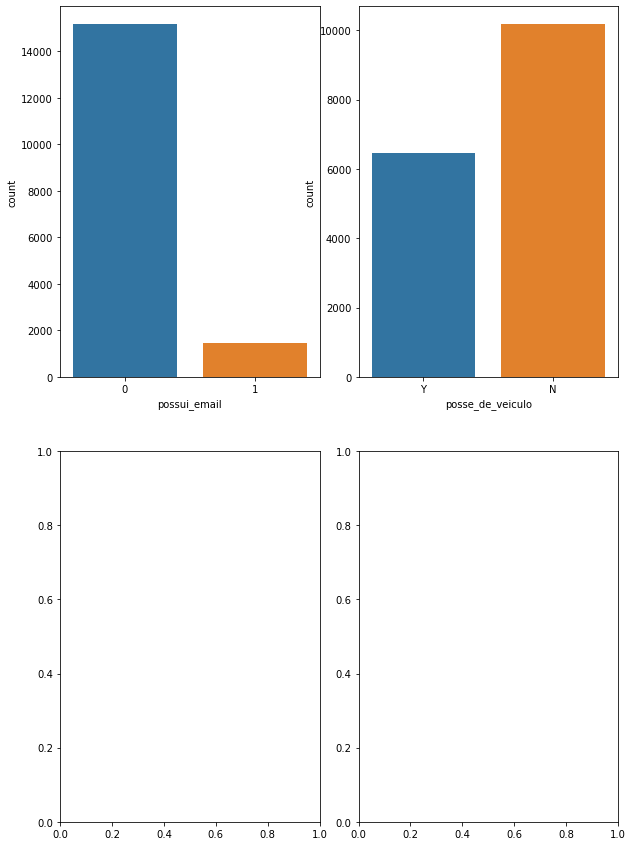

In [31]:
plt.rc('figure', figsize=(10,15))
fig, axes = plt.subplots(2,2)

sns.countplot(ax = axes[0, 0], x='possui_email', data=df)
sns.countplot(ax = axes[0, 1], x='posse_de_veiculo', data=df)

plt.subplots_adjust(wspace=0.15, hspace=0.2)

In [ ]:
# A variável possui email contém maior percentual de maus, em comparação ao posse_de_veiculo, portanto ela se mostra mais poderosa.

#### 5) Salve a base, pois ela será utilizada no final deste módulo.

In [33]:
df.to_csv('df.csv')